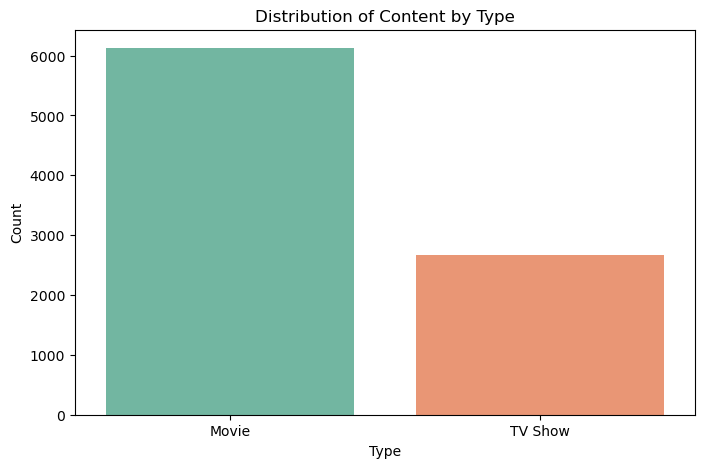

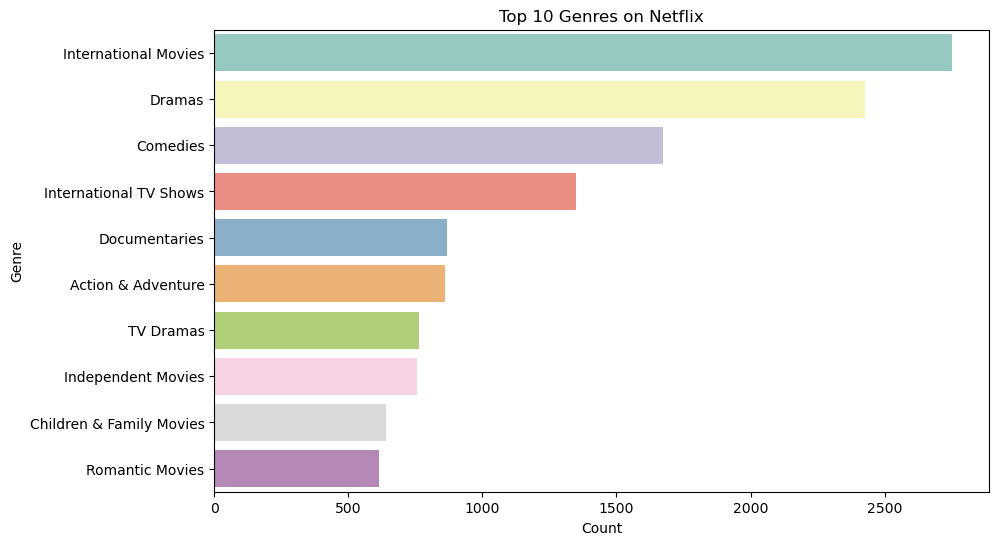

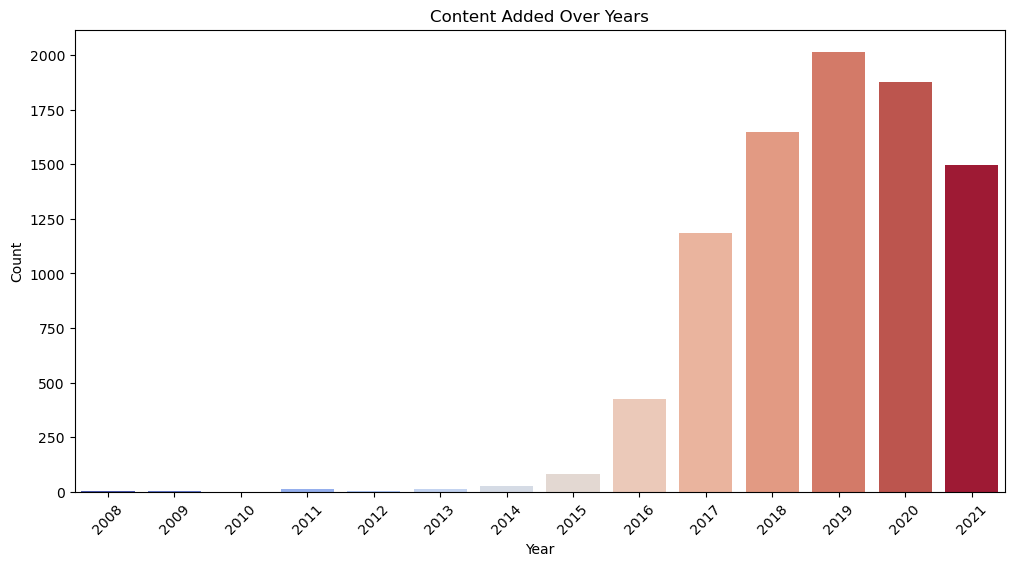

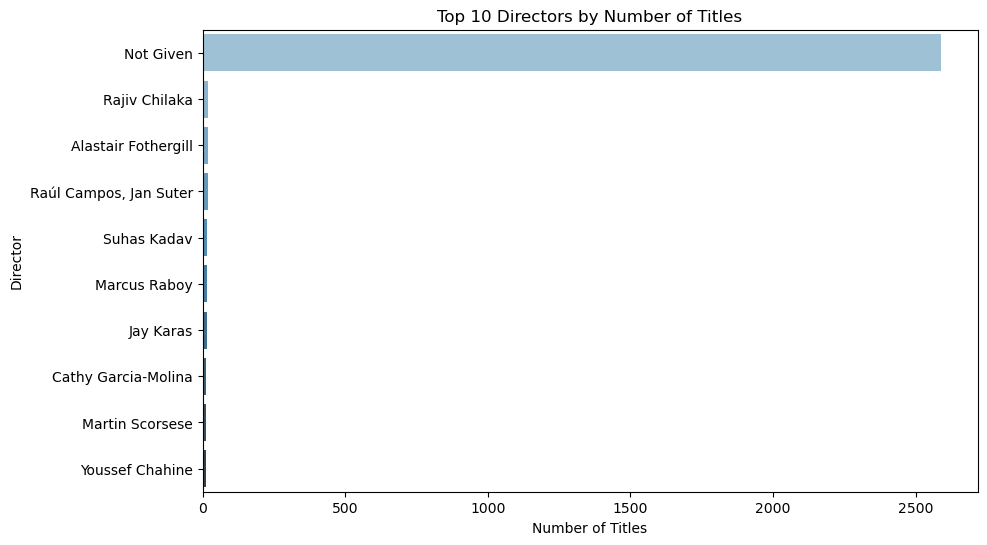

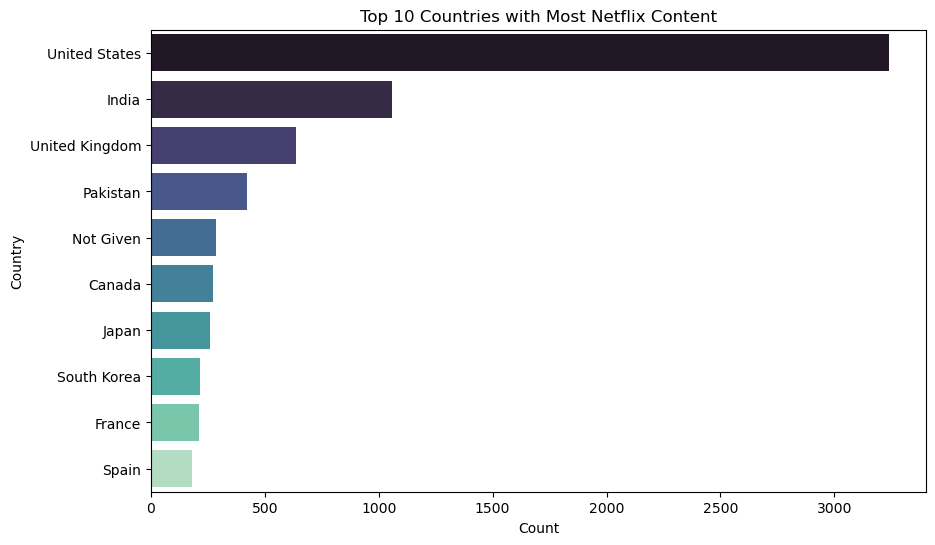

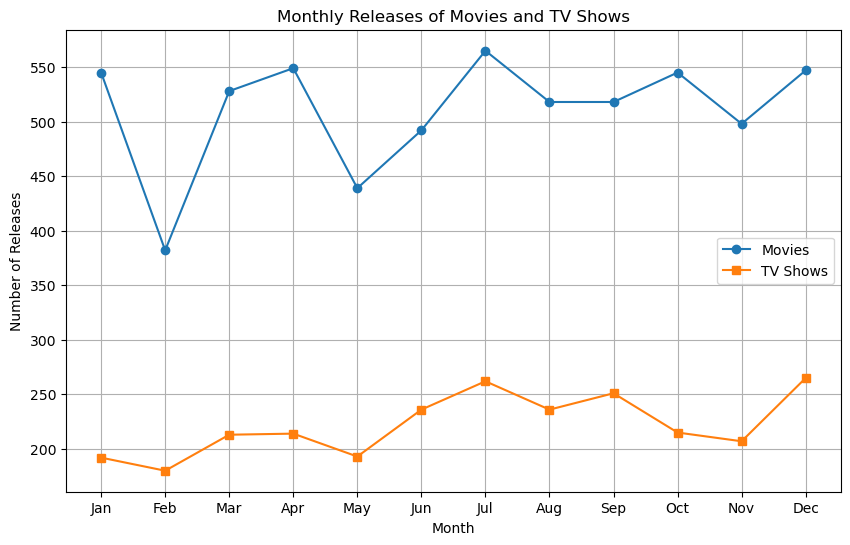

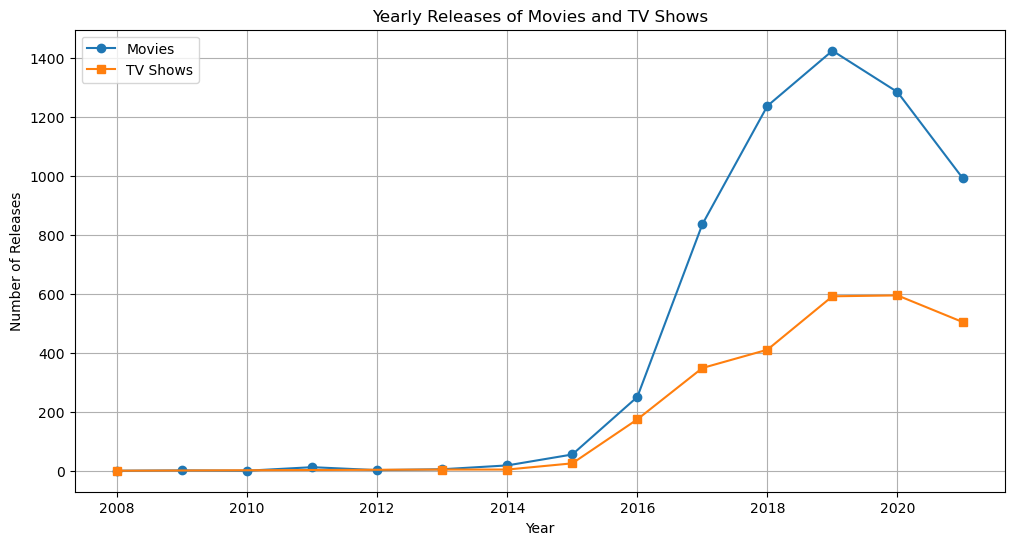

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("netflix1.csv")

# Clean data
data.drop_duplicates(inplace=True)
columns_to_check = ['director', 'country']
existing_columns = [col for col in columns_to_check if col in data.columns]
data.dropna(subset=existing_columns, inplace=True)

# Convert 'date_added' to datetime and extract year/month
if 'date_added' in data.columns:
    data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
    data.dropna(subset=['date_added'], inplace=True)
    data['year'] = data['date_added'].dt.year
    data['month'] = data['date_added'].dt.month
else:
    data['year'] = data['release_year'] if 'release_year' in data.columns else np.nan
    data['month'] = np.nan

# Split genres
if 'listed_in' in data.columns:
    data['genres'] = data['listed_in'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
else:
    data['genres'] = [[] for _ in range(len(data))]

# 📊 Content type distribution
if 'type' in data.columns:
    type_df = data['type'].value_counts().reset_index()
    type_df.columns = ['Type', 'Count']
    plt.figure(figsize=(8, 5))
    sns.barplot(data=type_df, x='Type', y='Count', hue='Type', legend=False, palette='Set2')
    plt.title("Distribution of Content by Type")
    plt.xlabel("Type")
    plt.ylabel("Count")
    plt.show()

# 📊 Top 10 genres
all_genres = sum(data['genres'], [])
if all_genres:
    genre_df = pd.Series(all_genres).value_counts().reset_index().head(10)
    genre_df.columns = ['Genre', 'Count']
    plt.figure(figsize=(10, 6))
    sns.barplot(data=genre_df, x='Count', y='Genre', hue='Genre', legend=False, palette='Set3')
    plt.title("Top 10 Genres on Netflix")
    plt.xlabel("Count")
    plt.ylabel("Genre")
    plt.show()

# 📈 Content added over years
if 'year' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x='year', hue='year', legend=False, palette='coolwarm')
    plt.title("Content Added Over Years")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# 🎬 Top 10 directors
if 'director' in data.columns:
    directors_df = data['director'].value_counts().reset_index().head(10)
    directors_df.columns = ['Director', 'Count']
    plt.figure(figsize=(10, 6))
    sns.barplot(data=directors_df, x='Count', y='Director', hue='Director', legend=False, palette='Blues_d')
    plt.title("Top 10 Directors by Number of Titles")
    plt.xlabel("Number of Titles")
    plt.ylabel("Director")
    plt.show()

# 🌍 Top 10 countries
if 'country' in data.columns:
    countries_df = data['country'].value_counts().reset_index().head(10)
    countries_df.columns = ['Country', 'Count']
    plt.figure(figsize=(10, 6))
    sns.barplot(data=countries_df, x='Count', y='Country', hue='Country', legend=False, palette='mako')
    plt.title("Top 10 Countries with Most Netflix Content")
    plt.xlabel("Count")
    plt.ylabel("Country")
    plt.show()

# 📅 Monthly releases
if 'type' in data.columns and 'month' in data.columns:
    movie_month = data[data['type'] == 'Movie']['month'].value_counts().sort_index()
    show_month = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    plt.plot(movie_month.index, movie_month.values, marker='o', label='Movies')
    plt.plot(show_month.index, show_month.values, marker='s', label='TV Shows')
    plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.title("Monthly Releases of Movies and TV Shows")
    plt.xlabel("Month")
    plt.ylabel("Number of Releases")
    plt.grid(True)
    plt.legend()
    plt.show()

# 📆 Yearly releases
if 'type' in data.columns and 'year' in data.columns:
    movie_year = data[data['type'] == 'Movie']['year'].value_counts().sort_index()
    show_year = data[data['type'] == 'TV Show']['year'].value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    plt.plot(movie_year.index, movie_year.values, marker='o', label='Movies')
    plt.plot(show_year.index, show_year.values, marker='s', label='TV Shows')
    plt.title("Yearly Releases of Movies and TV Shows")
    plt.xlabel("Year")
    plt.ylabel("Number of Releases")
    plt.grid(True)
    plt.legend()
    plt.show()
